In [1]:
# Project will detect tampering of pan card using Computer Vision
#The project will help the organization detect whether the ID provided to them by their employees or customers or anyone is original or not

In [3]:
#Proposed Steps

# 1. Get Images from users
# 2. Check for size and fromat of images
# 3. Change shape and size according to the original image 
# 4. Convert the image to grayscale
# 5. find the similarity index of the images
# 6. find the threshold of the image
# 7. finding the contour and grab those contour using IMUTILS
# 8. Draw a bounding rectangle using these contours
# 9. Plot difference , threshold, original and tampared image
# 10. Compare all the images and check the similarity score to decide tampering

In [6]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import image
import requests


ImportError: cannot import name 'image' from 'PIL' (C:\Users\onata\anaconda3\lib\site-packages\PIL\__init__.py)

In [5]:
pip install --upgrade imutils

Note: you may need to restart the kernel to use updated packages.Building wheels for collected packages: imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=f395627ca55cf159639c9d9f56b930e134fb545f8914c55d4b128995ac7de7fa
  Stored in directory: c:\users\onata\appdata\local\pip\cache\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [7]:
pip install --no-index -f https://dist.plone.org/thirdparty/ -U PIL

Looking in links: https://dist.plone.org/thirdparty/
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\onata\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\onata\\AppData\\Local\\Temp\\pip-install-dmtxjeem\\pil_ac773456beba4831b0e94f65a40bdd12\\setup.py'"'"'; __file__='"'"'C:\\Users\\onata\\AppData\\Local\\Temp\\pip-install-dmtxjeem\\pil_ac773456beba4831b0e94f65a40bdd12\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\onata\AppData\Local\Temp\pip-pip-egg-info-adm7yibq'
         cwd: C:\Users\onata\AppData\Local\Temp\pip-install-dmtxjeem\pil_ac773456beba4831b0e94f65a40bdd12\
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\onata\A

In [8]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [18]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [19]:
original_image = Image.open(r"C:\Users\onata\Documents\Data Projects\Linkedin and github project\pan_card_tampering\image\original.jpg")
tampered_image = Image.open(r"C:\Users\onata\Documents\Data Projects\Linkedin and github project\pan_card_tampering\image\tampared image.png")

In [20]:
print("Original image format: ", original_image.format)
print("Tampered image format: ", tampered_image.format)

print("Original image size: ", original_image.size)
print("Tampered image size: ", tampered_image.size)

Original image format:  JPEG
Tampered image format:  PNG
Original image size:  (780, 1040)
Tampered image size:  (768, 491)


# Converting the format of tampered image similar to original image

In [22]:
original = original_image.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered = tampered_image.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


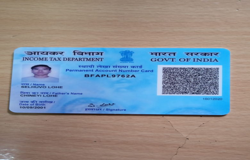

In [23]:
original

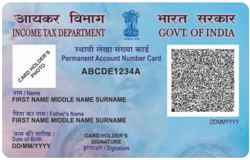

In [24]:
tampered

In [25]:
#load both images into computer vision
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [26]:
#convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [27]:
#computet the structural Similarity index (SSIM) BETWEEN THE TWO IMAGES, ensuring that the difference image is returned
(score,diff) = structural_similarity(original_gray, tampered_gray , full = True)
diff = (diff*255) .astype("uint8")
print("SSIM: {}". format(score))

SSIM: 0.2501907785890106


In [28]:
#the lower the SSIM score the better the similarity

In [29]:
tampered_gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [30]:
thresh = cv2.threshold(diff, 0 ,255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

    Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object . Compute the bounding box of the contour and then draw the bounding box on both input and output images to represent where the images are different or not.

In [31]:
for c in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,255),2)

Original Format Image


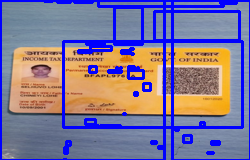

In [32]:
print('Original Format Image')
Image.fromarray(original)


Tampared Format Image


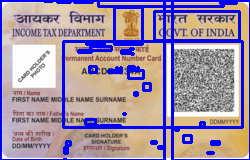

In [36]:
print('Tampared Format Image')
Image.fromarray(tampered)


Different image


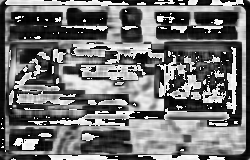

In [37]:
print ("Different image")
Image.fromarray(diff)

In [38]:
#the black spot shows the difference in the images.

Threshold Image


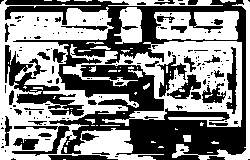

In [39]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

In [40]:
#we can conclude that it is a tampard image.

SUMMARY

Find out structural similarity of the images helped find the difference or similarity in the shape of the images. 
Similarly, finding out the threshold and contours based on these threshold for the images converted into grayscale binary also helped in shape analysis and recognition. 

As, the SSIM is approximately 25%, i can say the image user provided a fake or tampered card. 

Finally, i displayed and visualized the difference and similarities between the images by displaying the images with contours, difference and threshold.

In [42]:
import os 
from os import environ

In [ ]:
class Config(object):
    
    DEBUG = False
    TESTING = FALSE
    
    basedir = os.path.abspath(os.path.dirname(__file__))
    
    SECRET_KEY = 'pianalytix'
    
    UPLOADS = "/home/username/app/app/static/uploads"
    
    SESSION_COOKIE_SECURE = True
    DEFAULT_THEME = None
    
class DevelopmentConfig(Config):
    DEBUG = True
    SESSION_COOKIE_SECURE=False
    
class DebugConfig(Config):
    DEBUG =False